# Visualizing Samples and Labels of the SPARK Dataset

This notebook helps to inspect the SPARK dataset. You can see samples from the dataset, with the corresponding ground truth labels.

In [1]:
#import helper class

from utils import SPARKDataset , PyTorchSparkDataset
from matplotlib import pyplot as plt
from random import randint


In [2]:
# set up the path to a local copy of the SPARK dataset, labels csv files should be in the same directory.

dataset_root_dir = 'D:/Downloads/semester_project/project_files/train_small/data/'#'./data/'
split = 'train'

dataset = SPARKDataset(root_dir=dataset_root_dir,split=split)

In [3]:
print(dataset.root_dir)
print(dataset.labels.iloc[1]['class'])
print(dataset.labels.iloc[1]['image'])

D:/Downloads/semester_project/project_files/train_small/data/train
Debris
image_10700_img.png


D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Debris/image_10700_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/CubeSat/image_06718_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Terra/image_03675_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/TRMM/image_09722_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Terra/image_10638_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/CubeSat/image_00986_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Calipso/image_01795_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Calipso/image_01413_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Jason/image_07817_img.png
D:/Downloads/semester_project/project_files/train_small/data/trai

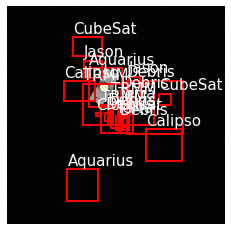

In [4]:
for i in range(1, 20):
    try:
        dataset.visualize(i, size=(15,15),  ax=None)
    except:
        print(f'Image {i} not found!')

In [5]:
i = 1
sat_name = dataset.labels.iloc[i]['class']
print(f'sat_name = {sat_name}')
img_name = dataset.labels.iloc[i]['image']
print(f'img_name = {img_name}')
image_name = f'{dataset.root_dir}/train_rgb/{sat_name}/{img_name}'
print(f'image_name = {image_name}')
#works until here, image really exists

#dataset.visualize(1, size=(15,15),  ax=None)

sat_name = Debris
img_name = image_10700_img.png
image_name = D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Debris/image_10700_img.png


In [6]:
import os
open(image_name, 'r')
file_exists = os.path.exists(image_name)
print(f'File exists: {file_exists}!')

File exists: True!


D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Debris/image_10700_img.png


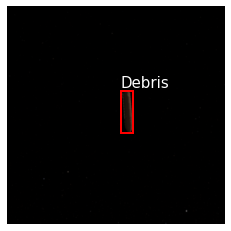

In [7]:
dataset.visualize(1, size=(15,15),  ax=None)

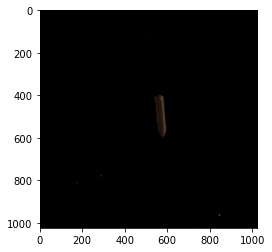

In [8]:
from skimage import io , img_as_uint
import matplotlib.pyplot as plt

image = io.imread(image_name)

ax = plt.gca()
ax.imshow(image,vmin=0, vmax=255)

### We show a number of random images from the dataset.

D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Jason/image_02320_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/TRMM/image_11082_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/TRMM/image_03891_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/AcrimSat/image_08601_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/CubeSat/image_04308_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Debris/image_18620_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Aquarius/image_03488_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/TRMM/image_03363_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/train_rgb/Terra/image_04378_img.png
D:/Downloads/semester_project/project_files/train_small/data/train/

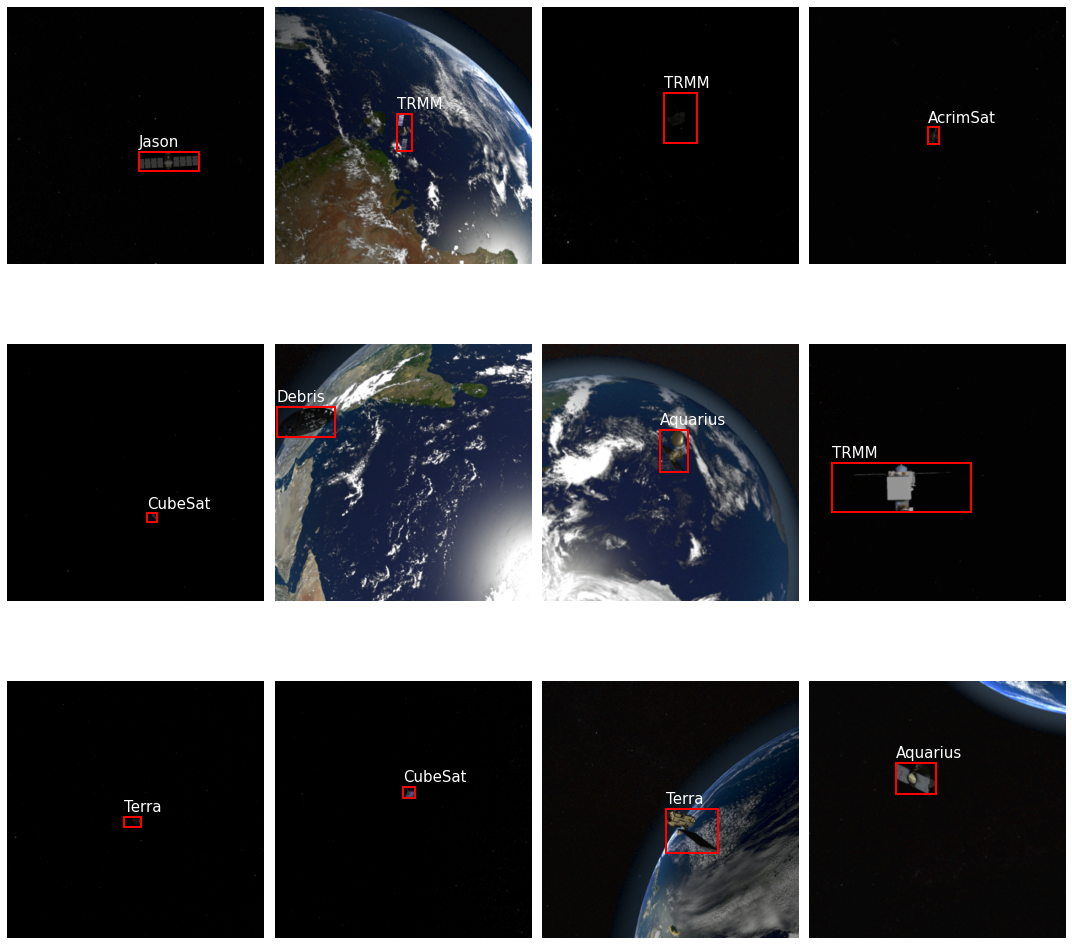

In [9]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 2000),size = (10,10),ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout() 

### Pytorch Dataset and dataloader for SPARK

In [10]:

pytorch_dataset = PyTorchSparkDataset(root_dir=dataset_root_dir,split='train')


ImportError: Pytorch is not available!

In [11]:
import torch

train_loader = torch.utils.data.DataLoader(pytorch_dataset, batch_size=10,drop_last=True)


for i,sample in enumerate(train_loader):
    print(f'image shape {sample[0].shape} labels shape {sample[1].shape} bounding box shape {sample[2].shape}')
    if i == 3:
        break


ModuleNotFoundError: No module named 'torch'